<a href="https://colab.research.google.com/github/ThomasWuensch/325-Midterm/blob/main/Copy_of_Midterm_Project_325_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [ ]:
vote= pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

In [ ]:
vote.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



***The purpose of this project is to analyze voter registration data with the expressed goal of coming to conclusions about how it changed and developed from 2016 to 2020. It is important for this notebook to be read because it contains important information about voting registration numbers that aligned with the start of the pandemic. Understanding this information allows us to come one step closer to truly understanding the impact of the pandemic. My two research questions reflect this. Question 1: Which states had their voting registration most affected during the pandemic relative to 2016? Question 2: Arizona was one of the closest states in the 2020 election. Did the level of political polarization lead to higher voter registration amounts than in 2016 or was it adversely effected by the ongoing lockdown?***

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:



vote.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

In [ ]:
vote.isna().values.any()
#Checks if any data is NULL/Missing

False

Check your data types. (1 point)

In [ ]:
'''
 Juristiction is a object data type and it is just the State the Voter Registration numbers took place in
 Year is the year they were counted
 Month is the month they were counted
 New Registered Voters is a int that represents first time voters, voters who moved to the state recently and in some states like texas, moved counties acorss the state
'''
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
vote=vote.rename(columns={"Jurisdiction":"NAME"})
vote=vote.rename(columns={"New registered voters":"registered_voters"})
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               106 non-null    object
 1   Year               106 non-null    int64 
 2   Month              106 non-null    object
 3   registered_voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Explain any potential limitations to your data (2 points)

***This dataset is limited due to the fact only a select few states are given and of those states, the comparison time is only before and during the pandemic. No data is used after the pandemic to see if any of these voter registraion trends persisted.***

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
vote.max()
#Virginia, 2020, May, 238281 registered votes

,0
NAME,Virginia
Year,2020
Month,May
registered_voters,238281


What is the average voter registration? (1 points)

In [ ]:
vote.registered_voters.mean()
#The average voter registration is 48223 people (Rounded to the neartest whole number)

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
high_voters=vote.loc[vote.registered_voters>48223]
high_voters.count()
#Voter Registration over the average happened 36 times

,0
NAME,36
Year,36
Month,36
registered_voters,36


How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:

"""
Texas 	8
California 	7
Florida 	7
North Carolina 	6
Illinois 	4
Arizona 	3
Georgia 	1
"""

high_voters.NAME.value_counts()


,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
"""
The three states with the highest average voter registraton overall are
California
Texas
Flordia
"""

all_avg=vote.groupby("NAME")["registered_voters"].mean()
top3=all_avg.sort_values(ascending=False)
top3.head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

Text(0, 0.5, 'Total Registered Voted')

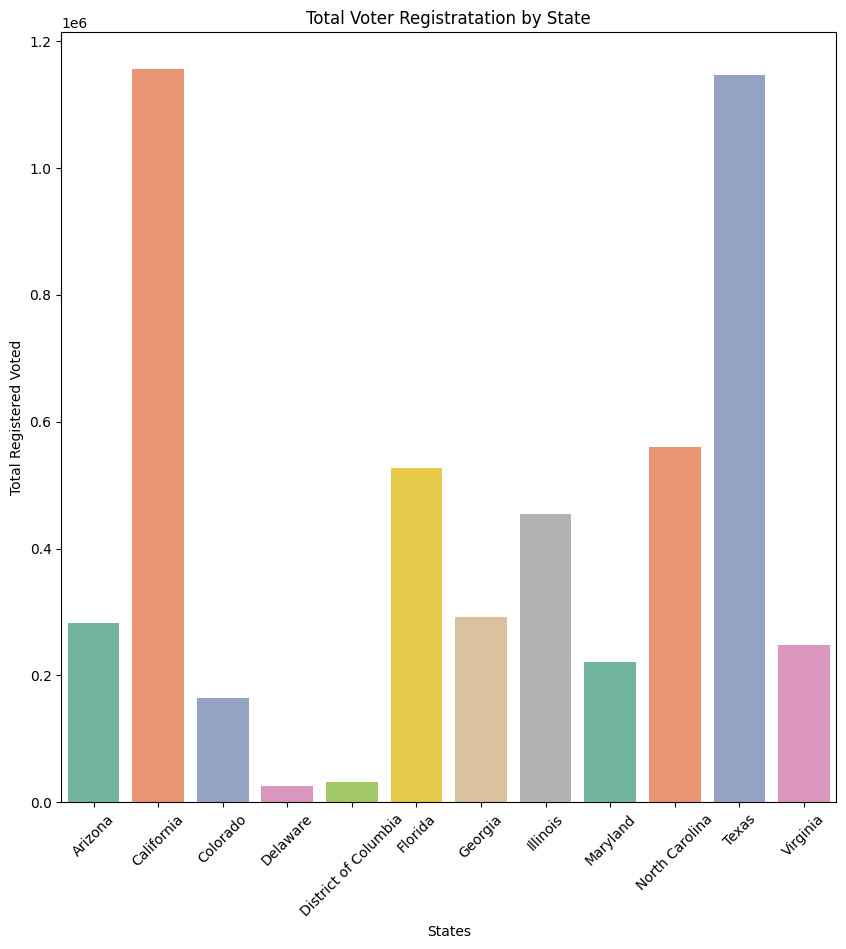

In [ ]:
total=vote.groupby("NAME")["registered_voters"].sum().reset_index()
states=["Arizona","California","Colorado","Delaware","District of Columbia","Florida","Georgia","Illinois","Maryland","North Carolina","Texas","Virginia"]

plt.figure(figsize=(10, 10))
sns.barplot(total,x="NAME",y="registered_voters", palette="Set2", hue="NAME",legend=False,)
plt.xticks(ticks = range(len(states)), labels = states, rotation =45)
plt.xlabel("States")
plt.title("Total Voter Registratation by State")
plt.ylabel("Total Registered Voted")
#One trend I noticed is that Flordia is way lower than California and Texas dispite having a large population.

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

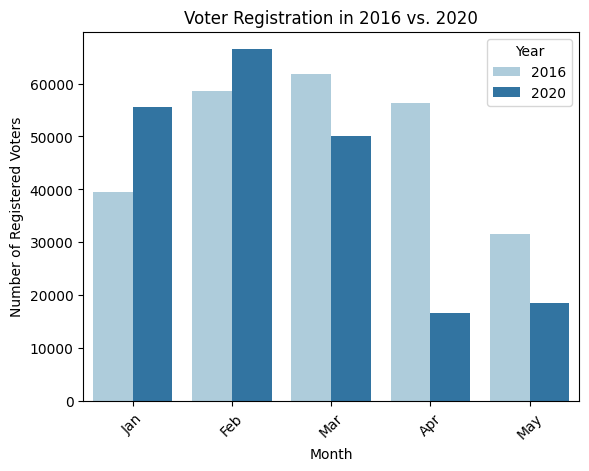

In [ ]:
sns.set_palette("Paired")
sns.barplot(vote,x="Month", y="registered_voters", palette="Paired", hue="Year", errorbar=None)
plt.title("Voter Registration in 2016 vs. 2020")
plt.xlabel("Month")
plt.ylabel("Number of Registered Voters")
plt.xticks(rotation=45)
plt.legend(title="Year")

#One major trend that I saw was that 2020 was set to outpace 2016 with registration until the pandemic hit, then it sharply decrease to levels under 2016.


Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

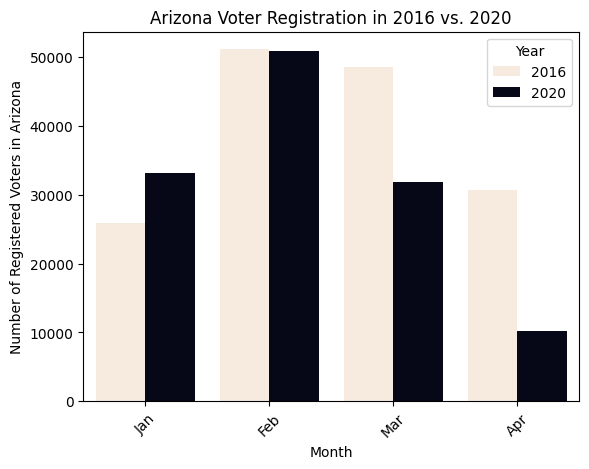

In [ ]:
AZ_DF=vote.loc[vote.NAME=="Arizona"]
sns.color_palette("rocket_r", as_cmap=True)
sns.barplot(AZ_DF,x="Month", y="registered_voters", palette="rocket_r", hue="Year", errorbar=None)
plt.title("Arizona Voter Registration in 2016 vs. 2020")
plt.xlabel("Month")
plt.ylabel("Number of Registered Voters in Arizona")
plt.xticks(rotation=45)
plt.legend(title="Year")

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

Create a dataframe that shows the average voter registration per state. (2 points)

In [ ]:
all_avg
#Used this dataframe in a earlier problem

,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [ ]:
mergeMap= bbox.merge(all_avg, on="NAME", how="inner")
mergeMap

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

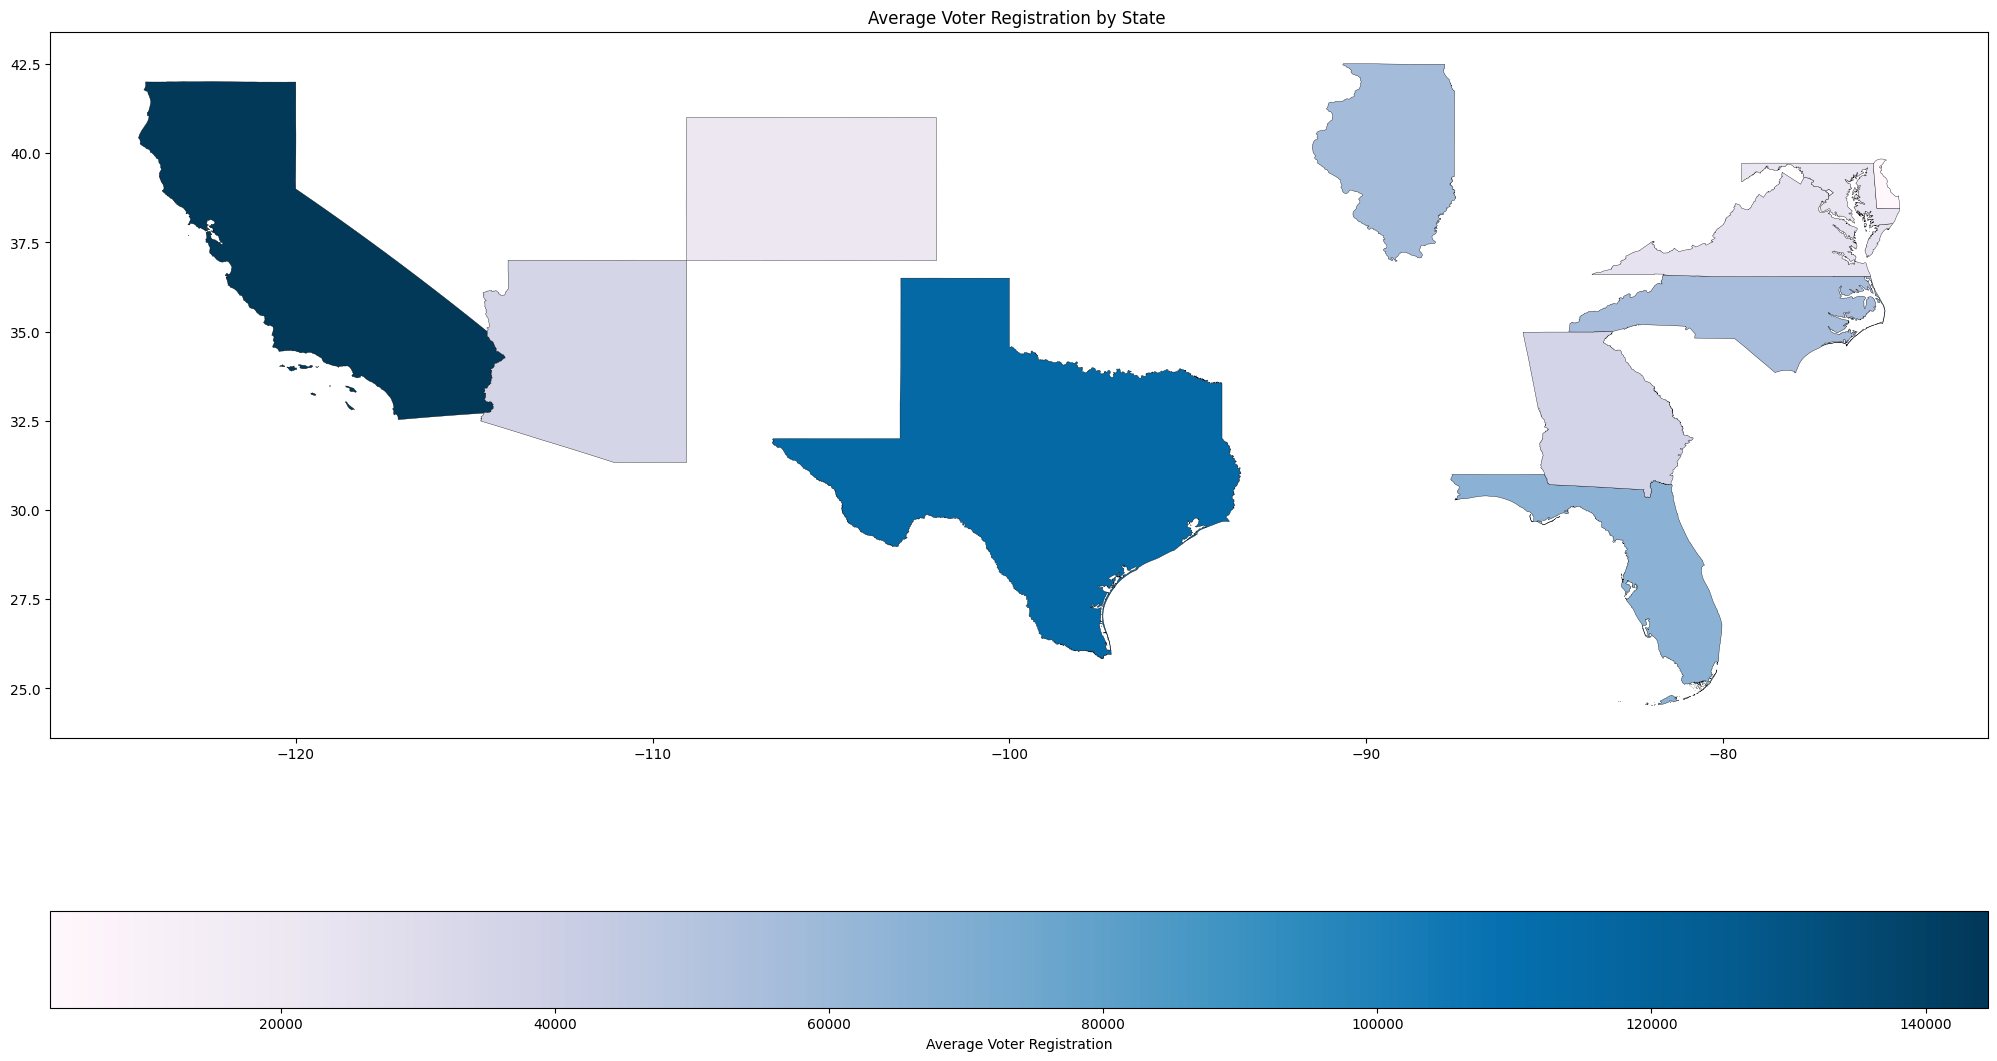

In [ ]:
fig=plt.figure(figsize=(25,15))
ax = fig.add_subplot()
mergeMap.plot(column="registered_voters",ax=ax,legend=True,cmap="PuBu",edgecolor="black",linewidth = .25, legend_kwds={"label": "Average Voter Registration","orientation": "horizontal"})
plt.title("Average Voter Registration by State ")
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


***The major conclusion I have come to while working on this notebook is that in 2020 voter registration dropped dramatically due to the pandemic in March/April. States with higher populations like Texas and California were able to keep a high average amount of registrations, although Texas could have been bolstered by its more lenient rules for determining a new voter registration (voters who moved between counties in the state are counted, for example). Voter numbers in January and February were outpacing their 2016 counterparts, which suggests that the voter enthusiasm was sufficiently curbed by the pandemic.***




***Realizing this discrepancy, I would recommend that my client use the state numbers infofar to analyze national trends instead as direct comparisons to one another. Each state's pandemic response was different, all of which could have had a varied effect on how easily people were able to register to vote.  I would also recommend trying to obtain more complete data; as of now, we only get a small snapshot of what was going on. With such limited data, it's hard to make statements that apply to states outside the scope of the data.***





***One major step I would undertake if continuing this project would be to seek out data for other states and attempt to try to gain more precise information (days instead of months) on when people register. The data being incomplete severely dampens its effectiveness and creates blind spots where important revelations about the data could be made. I would try to find data that goes to the day instead of the month because that would allow me to make specific claims about how the pandemic progressed from "just two weeks off" to a full lockdown, persuading people to register to vote.***

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [ ]:
https://github.com/ThomasWuensch/325-Midterm/tree/main

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
#Thomas Wuensch III